# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

From visually inspecting the output window the agent does not seem to move at all and remains stationary in which ever starting position he has been assigned to (which seems to be random at first glance). 

Rewards seem to be given at each step of the simulation. If no action is taken when an action could be taken the agent received negative rewards. These rewards seem to have a random nature to it and fall within a certain range [-4, -6]. 

If the light of the crosroad is red however, not taking an action is positively rewarded (between [1, 3]). I'm guessing this is so that we can give a positive reward for not crossing the red light instead of just punishing crossing the red light.

It also seems that the map is a grid that follows a Von Neumann neighbourhood with no cells non-traversable. Each connection is bidirectional however there seems to be a limit of 1 car per direction in each road (or transition area). 

I cannot tell if the map wraps around or not from this visualization.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

*In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.*

If by flags we mean attributes that be passed into the agent at creation time there are 4: The environment (or map); learning (boolean) which allows the agent to perform learning or not; epsilon (float) that controls the exploration factor; and alpha (float) which is used to control the learning factor (if learning is enabled)

*In the environment.py Python file, what Environment class function is called when an agent performs an action?*

The 'act(agent, action)' function takes which agent is 'acting' and which action is being performed would be the function you are interested in.

*In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?*

The 'render_text()' function is used to display text output in the console while 'render()' is used to render the GUI.

*In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?*

First the East-West direction is checked and then the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


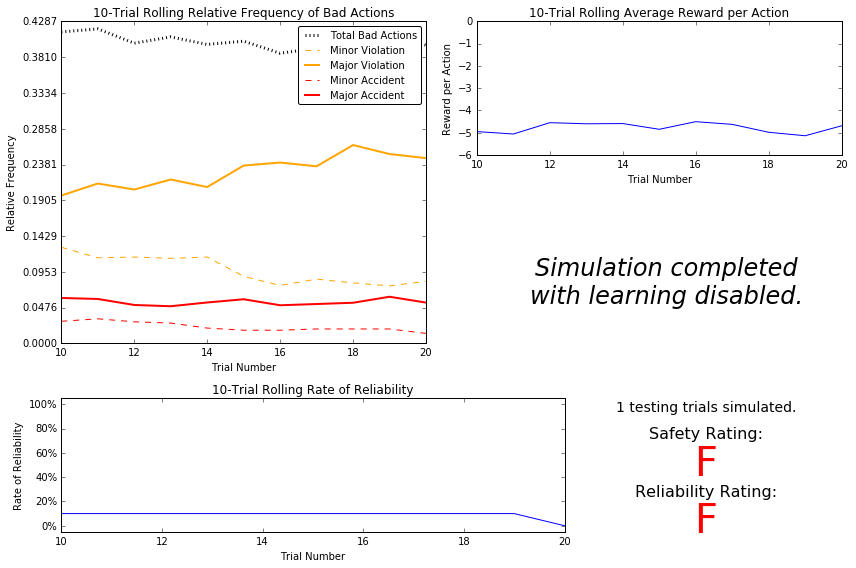

In [7]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The action frequency graph is behaving as I would expect of a random action agent. The frequency of choosing a bad action is fairly high. The probability of causing a major accident is higher then a minor accident (major accident can happen by wrongly going forward or left while minor accident can only happen when goind right). Assuming that a major accident and a major violation are mutually exclusive classifications this graph would suggest that the probability of there being a car on a cell is lower then the probability of me moving that cell. This is because the frequency of major/minor violations is fairly higher then that of accidents.

Since the ammount of bad actions is high its to be expected that the average reward per action is fairly low. However since major accidents give a penalty of -40 and major violations -10 I would have expected the average to be a bit lower. But then again the frequency of major accidents is a bit low so its possible they cannot affect the average too much.

The most interesting seems to be the Trial rolling rate of reliability where theis rate seems to almost double (from 20% to 40%) as we increase the number of trials.

Finally, this smartcab should not be considered overly safe or reliable. Chances of being involved in an accident are almost 10% (5% of being a major accident).
As for reliability most of the time the cab fails to reach the destination 60% of the time (and with lower trial numbers 80%!).


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

For learning safety we need to consider features that allows us to identify situations where accidents would happen. The available sensor data that could potentially be used is: 'left', 'right', and 'oncoming'. In these we have information regarding the intention of the car (if any) of where it wants to move. Notice that they do not give us information if the car will indeed move or not, just their intention. If additionally we consider that they too should follow traffic rules both 'left' and 'right' do not add any usefull information (traffic lights overule the right hand priority rule). The feature 'oncoming' is the exception because if there is a car oncoming it is a valid move for it to move forward (or right) and if so, we have to give it priority. Additionally, we want to make sure we are following rules in these cases (else 'left' and 'right' sensor data is required to avoid collisions) thus we need information on 'light'. The added bonus of using 'light' is that the number of states is reduced (2 vs 4x4 for 'left' and 'right') and we decrease traffic violations (thus increasing safety rating).

Efficiency is a bit hard for me to identiy, what makes a smarcab efficient? If by efficient we mean that he arrives on the destination on time (in line with reliable rating) then we would need to take into account features that first give us a direction to the target and how much time we have left. The most important feature would be the direction to the target, without this information we would randomly search the environment. In our case we have only 1 feature regarding direction information which is 'waypoint'. Since we have only one feature for direction it does not make sense to add the 'deadline' feature since the smarcab cannot do anything with this information (eg. does not matter if deadline is 1 or 100, if the waypoint says left, we need to go left to be efficient).

Finally we need to consider these 2 learnings combined. To learn solely efficiency 'deadline' was not considered because there was no possible interesting alternative action we could take. But with the features from learning safety we can! This is because of conflicting decisions (eg. efficiency says go left but safety says no because light is red). Without 'deadline' the agent could learn to do a general tradeoff between the two that works in the average case. But if we add it the agent can then do a smart tradeoff between the 2 (eg. agent moves safer if deadline is higher).

**NOTE**: Because the large number of learning states needed to account for the 'deadline' feature (calculated in question 5), this feature is dropped during the learning process. Thus the features selected for learning safety and efficient are:
- oncoming
- light
- waypoint

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

To calculate the size of the state space I would need to know the range of values of deadline. Dealine is calculated to be 5 times the distance between the location of the smartcab and the destination. In a wrapping grid such as the one we have, the maximum distance should be half the distance between the 2 furthest points, which is $(8+6)/2 = 7$. Thus the maximum deadline is $7*5=35$.

The number of states for the selected features is then:
- waypoint: 3 (left/forward/right)
- light: 2 (red/green)
- oncoming: 4 (None/left/forward/right)
- deadline: 35 (maxDistance * 5)

The total number of possible states is then: $3*2*4*35=840$! The main issue is that for each deadline state [0, 35] we have $3*2*4=24$ possible states. Exploring the full extent of each of these states is fairly difficult in a reasonable number of training trials, especially for higher deadline states (because deadline decreases each 'turn' lower deadline values are repeatadly visited). In liew of this information I would remove deadline from the set of features of learn (and potentially add it at a later date to see if my worries were just that, worries).

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

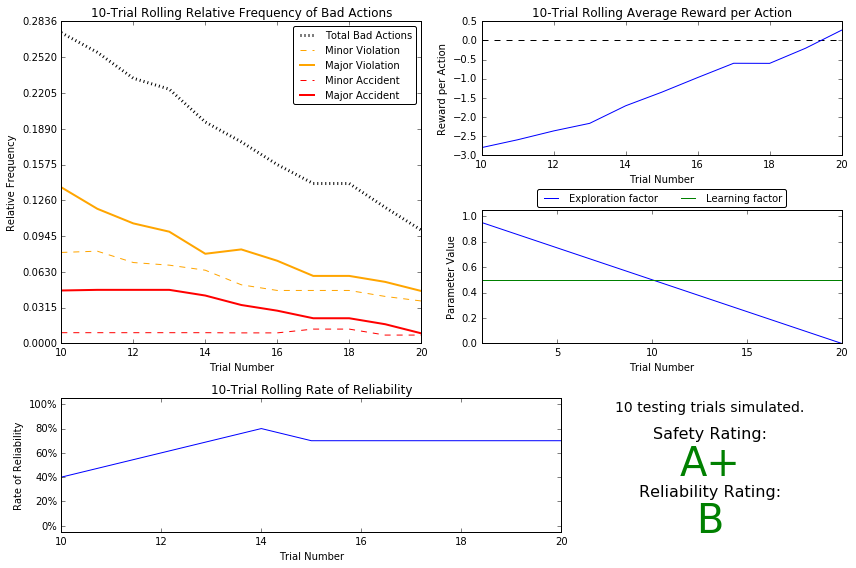

In [41]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

According to the results we can say the agent is learning safety and reliability. Safety got an A+ rating while reliability had a B rating which are major improvements. 

For safety rating we can the learning reflected in the frequency graph where the frequency of 'bad decisions' decreases over time. The average reward per action is also increasing over time. Interestingly enough the frequency of minor accidents does not seem to change. This is likely due to not being able to anticipate if a car in a target cell will be able to move or not. However the rate of major accidents and major violations is reducing which is likely tied to learning not to go over a red light.

The rate of reliability is also increasing over time, which tells us that the agent is successfuly learning how to follow the waypoints.

The exploration factor looks good over time. In the beggining it is high, at this point we likely do not have enough information to make good decisions so random works just as good. Then over time, we start focusing more and more on not making random decisions but instead using the feedback we have collected thus far. This behavior is also important to avoid local maxima, since we always select the action with the highest q-value, if by chance the first one we try gives us only a minor improvement, we will continuously select that one over any other non explored ones (because they start at 0 value).

Looking at the produced Q-table I found 26 action entries that still had the default value of '0.00'. Since we have a state space of 24, the number of total actions is $24*4=96$. This means about 27% of the entire action/state space was not explored. This value is still quite high which suggest that we might need more time to learn or a way to force the agent to try these combinations as well. Out of the entire set, one particular state was left mostly unexplored ('right'-waypoint, 'green', 'right'-oncoming) with only one action having been tried out 'forward' (even though it has positive q 'right' should be better). All of this is assuming the value '0.00' cannot be learned (which can happen - just find it unlikely).

**NOTE**: Running the algorithm several times gives different ratings (from D ratings to double A+..). I find this to be mostly correlated to the search space left unexplored.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

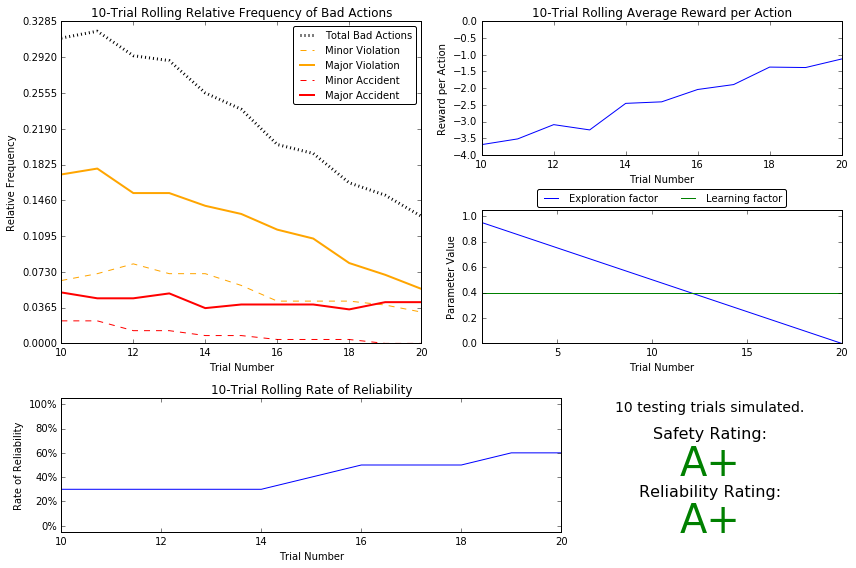

In [59]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

For the optimized learner I focused on trying to reduce the space left unexplored by the learner since the results I had were already quite good before. My idea on this would be to apply a random selection in a different way. Instead of applying it as a probability of selecting a random action, have it as probability of selecting a 'worse' action (or a default initialized one). However, since we were asked to play with decay functions and parameters I tried to use a combination that allows random to work its wonders for a bit longer (thus increasing the % of space explored) before settling in on a wining combination.

The decay function is a variation of the initial linear one, but instead of -0.05 increments we halve it at -0.025. This would double the number of trials to 40 before testing kicks in. Because of the increased time training I tried to reduce the learning rate a bit to 0.4 since we can let the value accumulate over time.

And then everything changed. While analysing the q-table I found an entry that did not correspond to my expectations. The entry was (waypoint: 'left', 'green', oncoming: 'left'). In theses states going left was greatly rewarded which is strange since 2 cars should not be able to occupy the same space (perhaps even having an accident). After looking into the code I found out that violations and accidents can **only** happen if the agent crossed a red light. Meaning as long as it is a green light it's fine to go whereever the agents wants to go. Thus, the biggest optimization I could make was reducing the number of states to a mere 6 states which is a combination of only (waypoint, light).

Even though the reduction of states means I don't need to run as many trials, using the previous sensory data with the modified parameters still achieved reliably reproducible results.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1

The optimal policy for our environment would be:

- Do not move if the light is red
- Move towards the waypoint if the light is green

This policy should avoid all traffic violations and any accidents. This policy is based on my knowledge of how the environment works (thanks to finding some entries on the q-table that had unexpected values and then analysing the code that defines violations and accidents).

2

Not for every state. Before the optimization to 2 features only there was at least one state (waypoint: 'forward', 'green', oncoming: 'left') where the action to move forward was at default 0.00 (there was a local optima with 'right' having 0.95), in this example state I would have expected the action 'forward' to be the policy.

3

(waypoint: 'left', light: 'green')
 -- forward : 0.68
 -- right : 0.96
 -- None : -5.69
 -- left : 1.53 [Going left is indeed the best action to take since the light is green and the waypoint is to the left]
 
 (waypoint: 'left', light: 'red')
 -- forward : -23.79
 -- right : -8.98
 -- None : 1.60 [Taking no action is best because otherwise we are commiting a violation and potentially an accident]
 -- left : -11.38
 
4

I can give the same example at in 2 when I used to train in higher dimensionality:
(waypoint: 'forward', light: 'green', oncoming: 'left')
 -- forward : 0.00
 -- right : 0.95
 -- None : -4.56
 -- left : 0.00

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The main issue with the environment is that it is random. The cars are moving and the lights are changing so we cannot predict a correct future state based on an action. Also we do not have information regarding the next waypoint, thus not even that parameter we can foresee!

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.